# kNN: k Nearest Neighbor for carbon, silicon, and nitrogen isotopes

In [1]:
# Imports
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Read the CSV file

In [2]:
# Read the csv file into a pandas DataFrame
C_Si_N = pd.read_csv('presolargrains_C_Si_N.csv')
C_Si_N.head()

,Type,carbon_12_13,nitrogen_14_15,silicon_29_28,silicon_30_28
0,X,74.30,207.4,-685.0,-520.0
1,X,1581.00,116.0,-684.0,-490.0
2,X,234.75,187.2,-683.0,-501.0
3,X,455.00,140.0,-662.0,-770.0
4,X,823.00,44.0,-658.0,-234.0


In [3]:
# Set Type for y value
X = C_Si_N.drop("Type", axis=1)
y = C_Si_N['Type'].values.reshape(-1, 1)
target_names = ["AB", "C", "M", "N", "U", "X", "Y", "Z"]
print(X.shape, y.shape)

(1301, 4) (1301, 1)


In [6]:
# Label Encoder and Transform
label_encoder = LabelEncoder()

data = X.copy()

label_encoder.fit(data['carbon_12_13'])
label_encoder.transform(data.carbon_12_13)
label_encoder.fit(data['nitrogen_14_15'])
label_encoder.transform(data.nitrogen_14_15)
label_encoder.fit(data['silicon_29_28'])
label_encoder.transform(data.silicon_29_28)
label_encoder.fit(data['silicon_30_28'])
label_encoder.transform(data.silicon_30_28)
label_encoder.classes_


array([-7.7000e+02, -7.1900e+02, -7.0500e+02, -6.9400e+02, -6.9100e+02,
       -6.6800e+02, -6.5900e+02, -6.5800e+02, -6.4714e+02, -6.4700e+02,
       -6.3000e+02, -6.2800e+02, -6.1700e+02, -6.0500e+02, -5.9900e+02,
       -5.9400e+02, -5.9300e+02, -5.8900e+02, -5.8700e+02, -5.8500e+02,
       -5.8200e+02, -5.8100e+02, -5.7200e+02, -5.6800e+02, -5.6500e+02,
       -5.5300e+02, -5.5200e+02, -5.4900e+02, -5.3600e+02, -5.3500e+02,
       -5.3000e+02, -5.2900e+02, -5.2800e+02, -5.2300e+02, -5.2200e+02,
       -5.2000e+02, -5.1900e+02, -5.1700e+02, -5.1200e+02, -5.1100e+02,
       -5.1000e+02, -5.0800e+02, -5.0400e+02, -5.0190e+02, -5.0100e+02,
       -5.0000e+02, -4.9800e+02, -4.9680e+02, -4.9600e+02, -4.9400e+02,
       -4.9300e+02, -4.9100e+02, -4.9000e+02, -4.8400e+02, -4.8100e+02,
       -4.8000e+02, -4.7900e+02, -4.7700e+02, -4.7300e+02, -4.7200e+02,
       -4.7100e+02, -4.6900e+02, -4.6800e+02, -4.6700e+02, -4.6500e+02,
       -4.6300e+02, -4.6188e+02, -4.6100e+02, -4.5900e+02, -4.58

## Create Train Test Split

In [7]:
# Separate data into train and test buckets
data_train, data_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Scale the data using MinMaxScalar

In [8]:
# MinMaxScalar
data_minmax = MinMaxScaler().fit(data_train)

data_train_minmax = data_minmax.transform(data_train)
data_test_minmax = data_minmax.transform(data_test)


## Find the best k value

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(X_train_minmax, y_train_minmax)
    #train_score = knn.score(X_train_minmax, y_train_minmax)
    #test_score = knn.score(X_test_minmax, y_test_minmax)
    knn.fit(data_train_minmax, y_train)
    train_score = knn.score(data_train_minmax, y_train)
    test_score = knn.score(data_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.871
k: 3, Train/Test Score: 0.911/0.837
k: 5, Train/Test Score: 0.876/0.831
k: 7, Train/Test Score: 0.861/0.819
k: 9, Train/Test Score: 0.841/0.819
k: 11, Train/Test Score: 0.832/0.810
k: 13, Train/Test Score: 0.829/0.804
k: 15, Train/Test Score: 0.825/0.807
k: 17, Train/Test Score: 0.821/0.807
k: 19, Train/Test Score: 0.819/0.807


## Plot the train and test scores

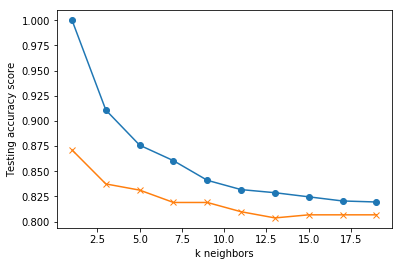

In [10]:
# Plot train scores in blue with marker 'o' and test scores in orange with marker 'x'
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

## Train the model and return the test score

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data_train_minmax, y_train)
print('k=1 Test Acc: %.3f' % knn.score(data_test_minmax, y_test))

k=1 Test Acc: 0.871


## Save the model

In [12]:
# Save model to file
filename = 'kNN_C_Si_N.sav'
joblib.dump(knn, filename)

['kNN_C_Si_N.sav']

## Summary:

### k Nearest Neighbor carbon, silicon, and nitrogen (k=1): 87.1%